In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

In [44]:
with open('Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [45]:
df=pd.read_csv('Ames_outliers_removed.csv')

In [46]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [48]:
df.shape

(2927, 81)

In [49]:
df=df.drop('PID', axis=1)

In [50]:
len(df.columns)

80

In [51]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [52]:
100 * df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

### Create a function for missing values

In [53]:
def percent_missing(df):
    percent_nan=100 * df.isnull().sum() / len(df)
    percent_nan=percent_nan[percent_nan>0].sort_values()

    return percent_nan

In [54]:
percent_nan=percent_missing(df)

percent_nan

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

## Visualizing the missing values

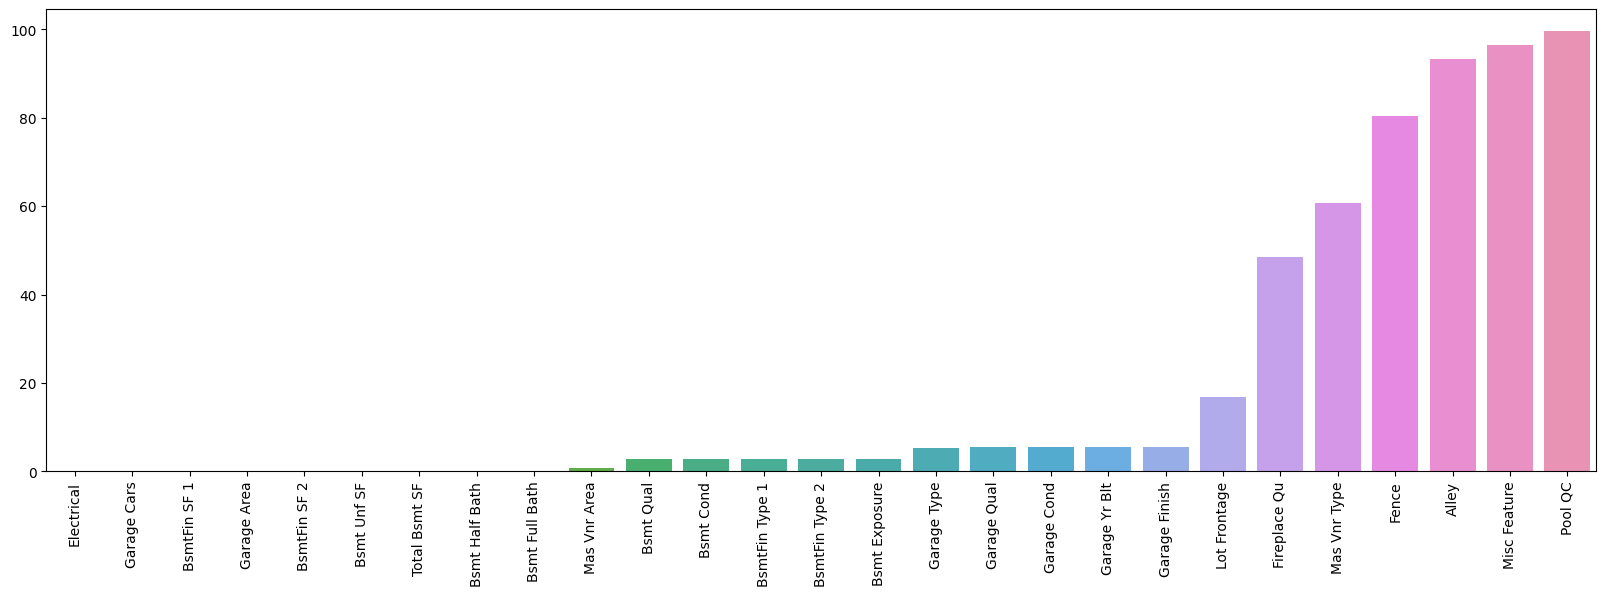

In [55]:
plt.figure(figsize=(20,6))

sn.barplot(x=percent_nan.index, y=percent_nan.values)

plt.xticks(rotation=90)
plt.show()

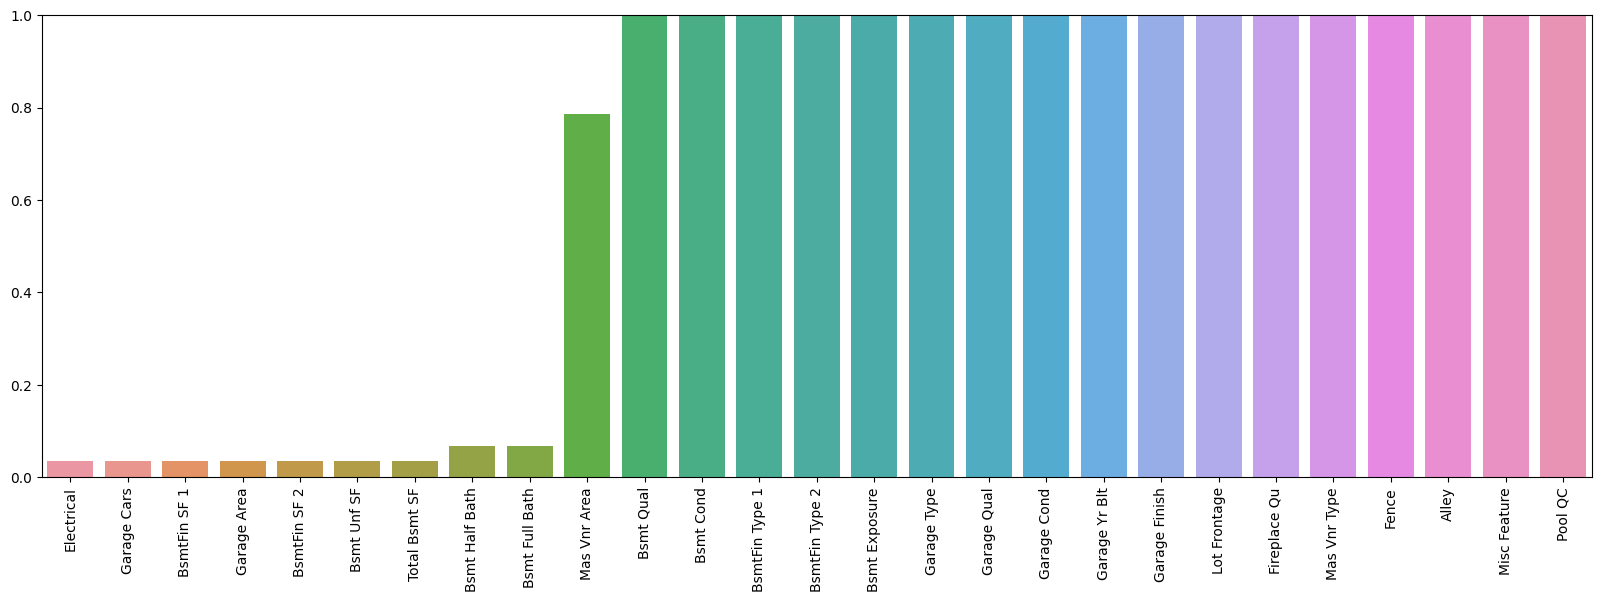

In [56]:
plt.figure(figsize=(20,6))

sn.barplot(x=percent_nan.index, y=percent_nan.values)

plt.xticks(rotation=90)
plt.ylim(0,1)
plt.show()

In [57]:
percent_nan[percent_nan<1]

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [58]:
100/len(df)

0.0341646737273659

1. **So it means above the columns there are only one values which is Nan or missing.**
2. **For 0.068 it means there are two values which are missing completely here.**

In [59]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [60]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


#### After removing the Electrical ans Garage Cars

In [61]:
df=df.dropna(axis=0, subset=['Electrical','Garage Cars'])

In [62]:
percent_nan=percent_missing(df)

percent_nan[percent_nan<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Area      0.786325
dtype: float64

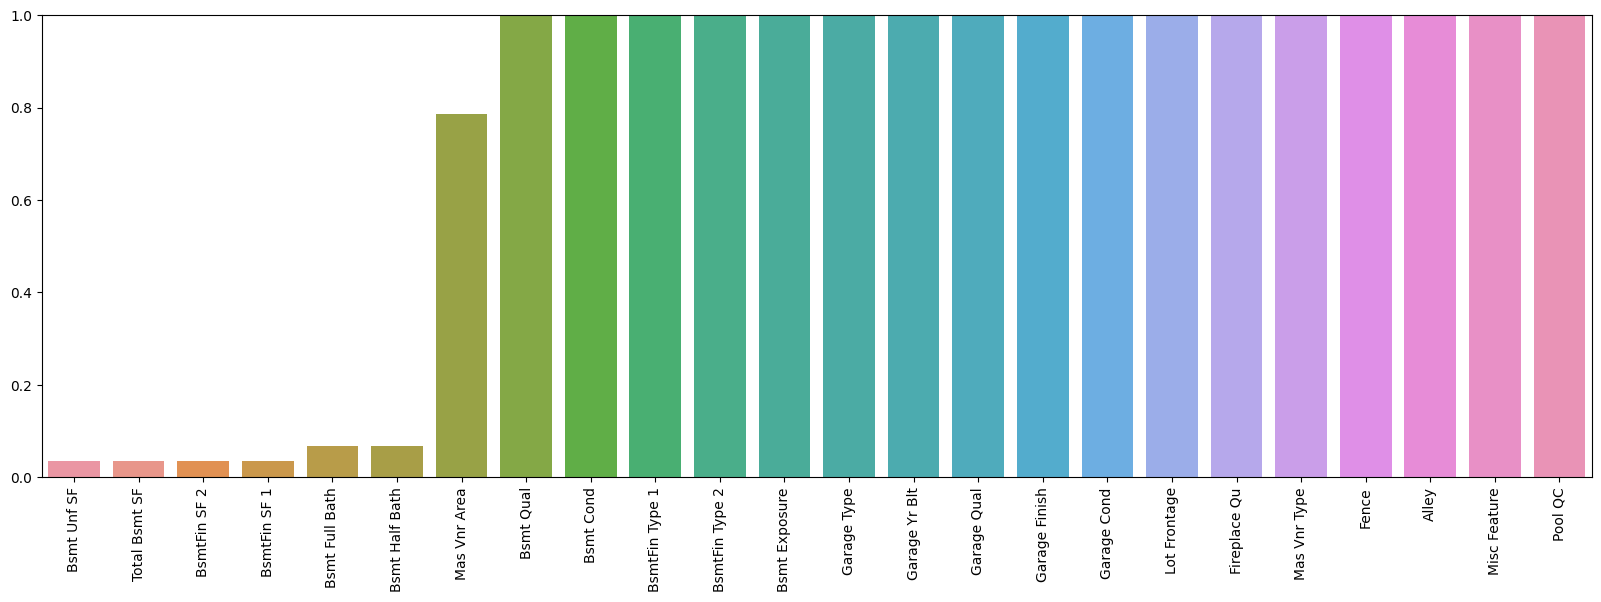

In [63]:
plt.figure(figsize=(20,6))

sn.barplot(x=percent_nan.index, y=percent_nan.values)

plt.xticks(rotation=90)
plt.ylim(0,1)
plt.show()

#### As you can see these features have a direct link with basement means either the basement is not present in here.

In [64]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [65]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [66]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


### BSMT Numeric Columns --> fillna 0.

In [67]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

### BSMT String Columns --> fillna with None.

In [68]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

#### Checking if any missing values are present are not

In [69]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


### We have done with the features which have 0 or less than 1% missing values.

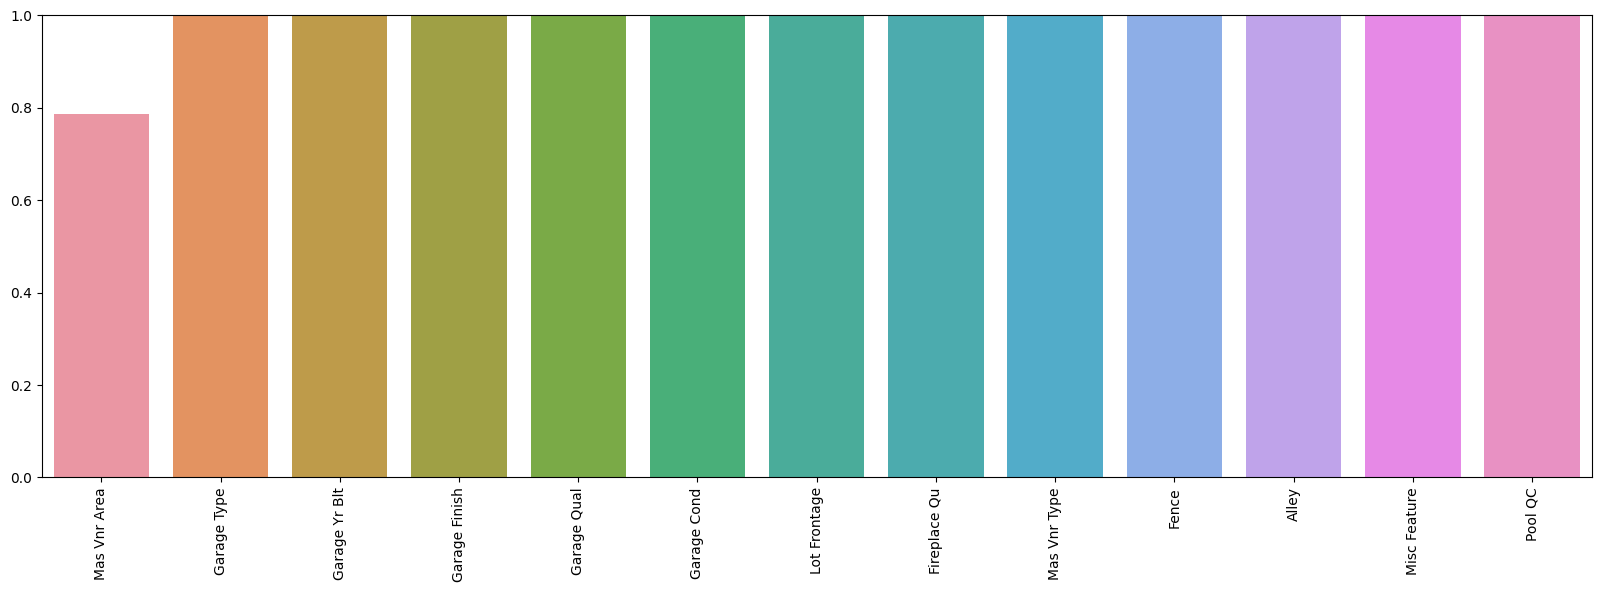

In [70]:
percent_nan=percent_missing(df)

plt.figure(figsize=(20,6))

sn.barplot(x=percent_nan.index, y=percent_nan.values)

plt.xticks(rotation=90)
plt.ylim(0,1)
plt.show()

In [71]:
df['Mas Vnr Type']=df['Mas Vnr Type'].fillna("None")

In [72]:
df['Mas Vnr Area']=df['Mas Vnr Area'].fillna("None")

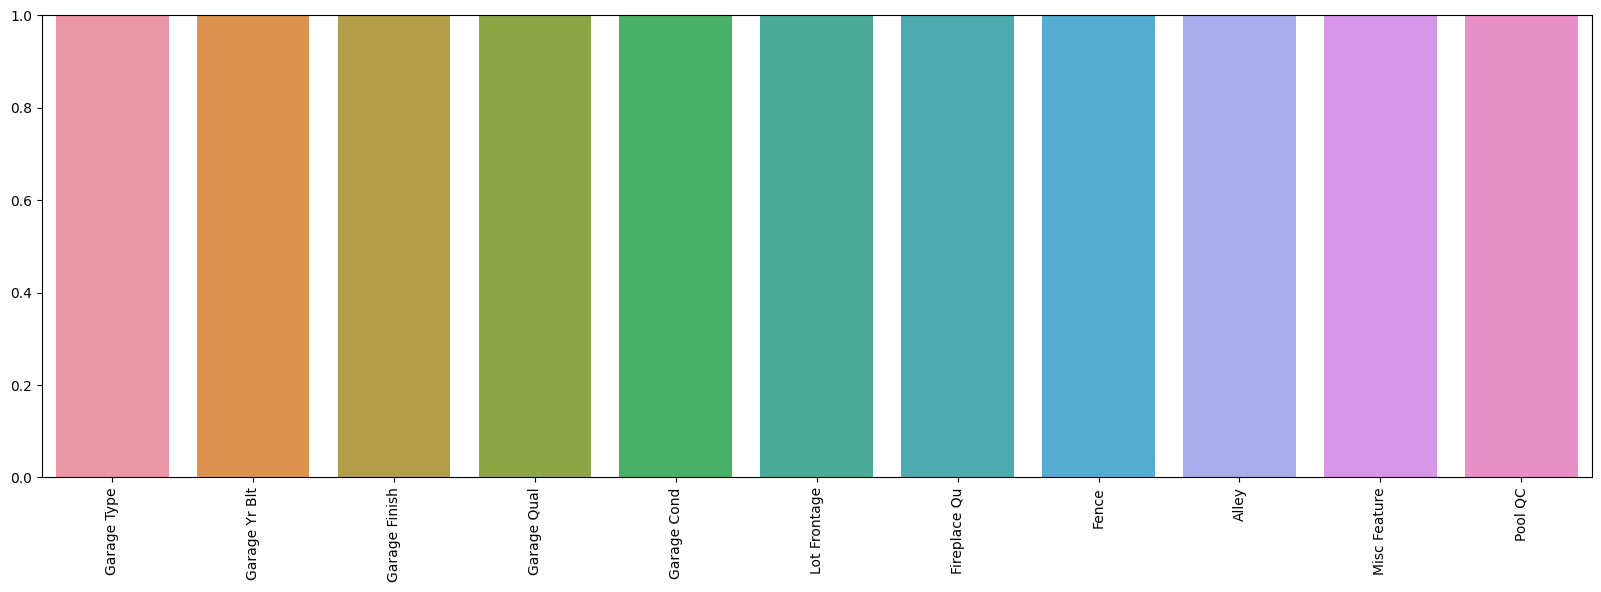

In [73]:
percent_nan=percent_missing(df)

plt.figure(figsize=(20,6))

sn.barplot(x=percent_nan.index, y=percent_nan.values)

plt.xticks(rotation=90)
plt.ylim(0,1)
plt.show()

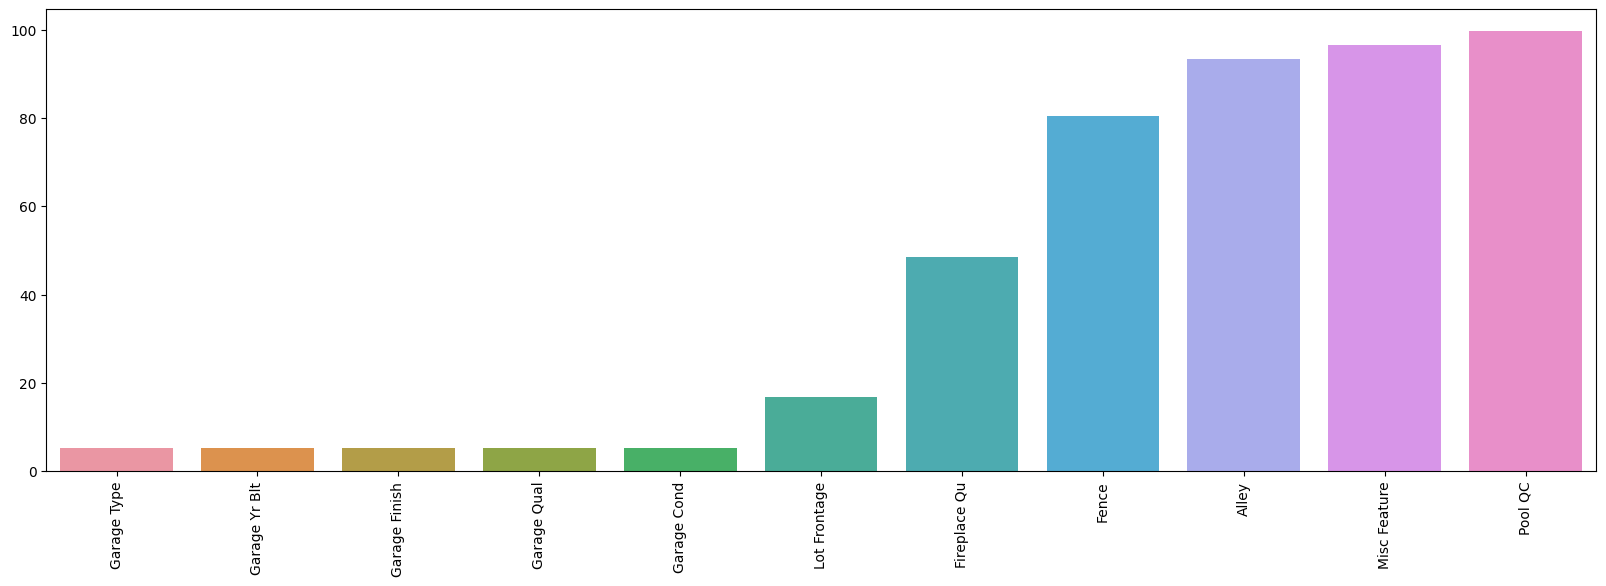

In [74]:
percent_nan=percent_missing(df)

plt.figure(figsize=(20,6))

sn.barplot(x=percent_nan.index, y=percent_nan.values)

plt.xticks(rotation=90)
plt.show()

## Now we have deal it where more than 1% missing values are present in the features.

In [75]:
gar_str_cols=['Garage Type','Garage Finish', 'Garage Qual','Garage Cond']

In [76]:
df[gar_str_cols]=df[gar_str_cols].fillna('None')

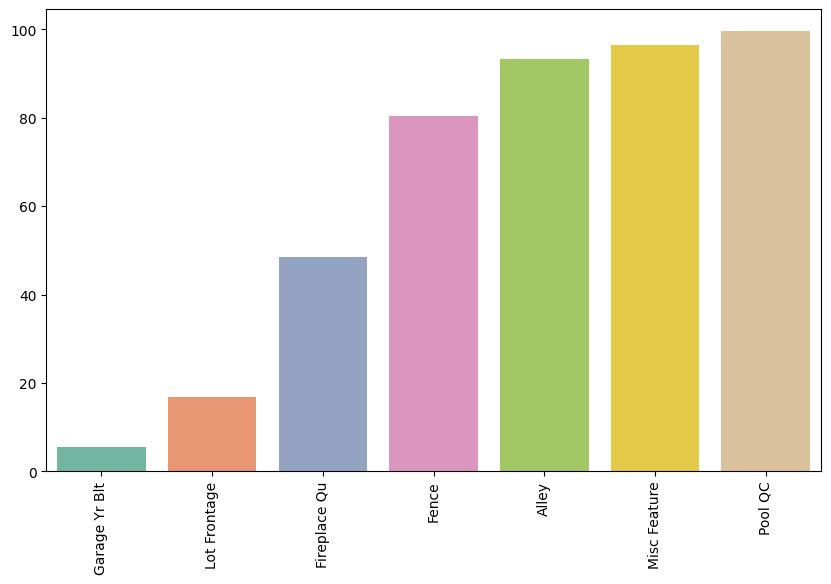

In [77]:
percent_nan=percent_missing(df)

plt.figure(figsize=(10,6))

sn.barplot(x=percent_nan.index, y=percent_nan.values, palette='Set2')

plt.xticks(rotation=90)
plt.show()

In [78]:
df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)

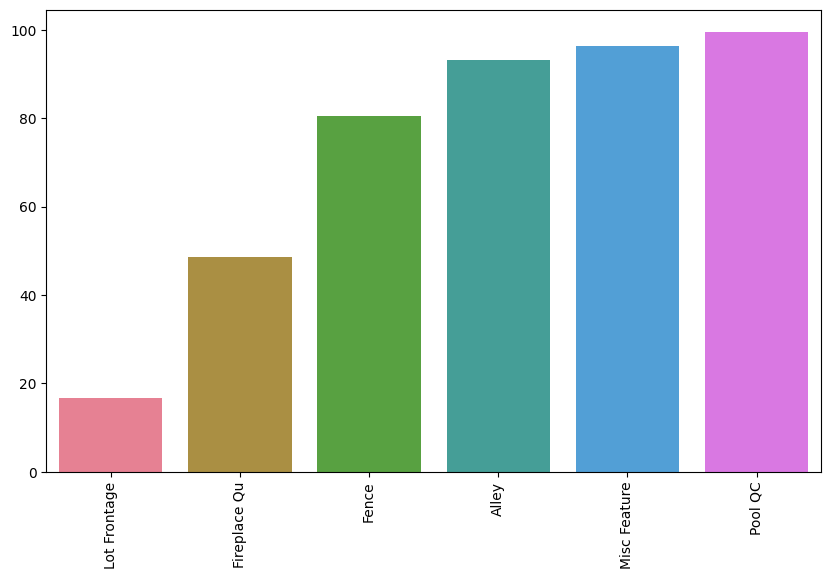

In [79]:
percent_nan=percent_missing(df)

plt.figure(figsize=(10,6))

sn.barplot(x=percent_nan.index, y=percent_nan.values, palette='husl')

plt.xticks(rotation=90)
plt.show()

In [80]:
df=df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

### After Dropping the larger values, we are in a stage where the area of not enough is missing to drop the feature but too little is missing to just drop a couple pf features.

### We have to more careful about that.

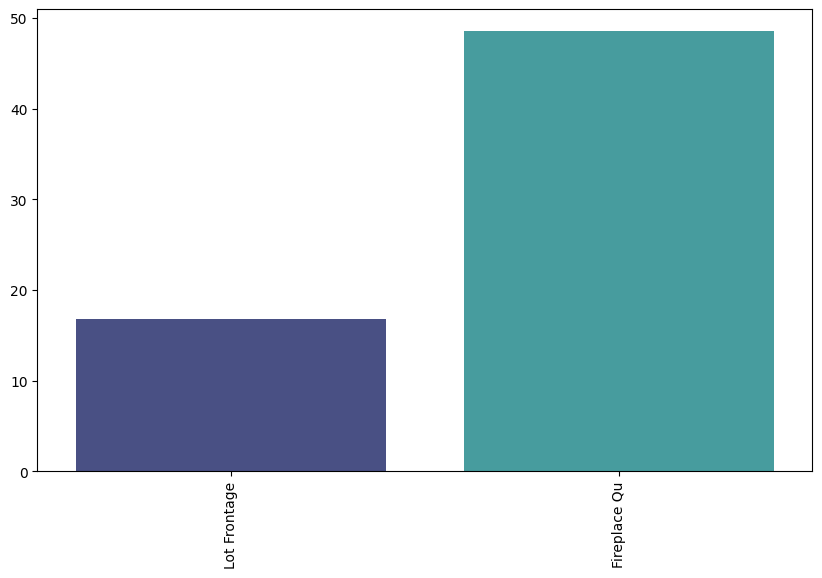

In [81]:
percent_nan=percent_missing(df)

plt.figure(figsize=(10,6))

sn.barplot(x=percent_nan.index, y=percent_nan.values, palette='mako')

plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Fireplace Qu'>

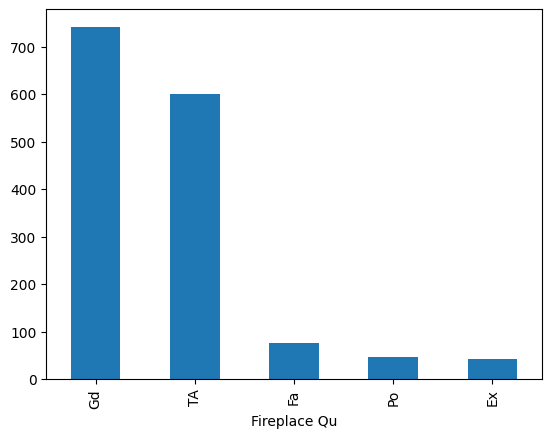

In [83]:
df['Fireplace Qu'].value_counts().plot(kind='bar')

In [84]:
df['Fireplace Qu']=df['Fireplace Qu'].fillna("None")

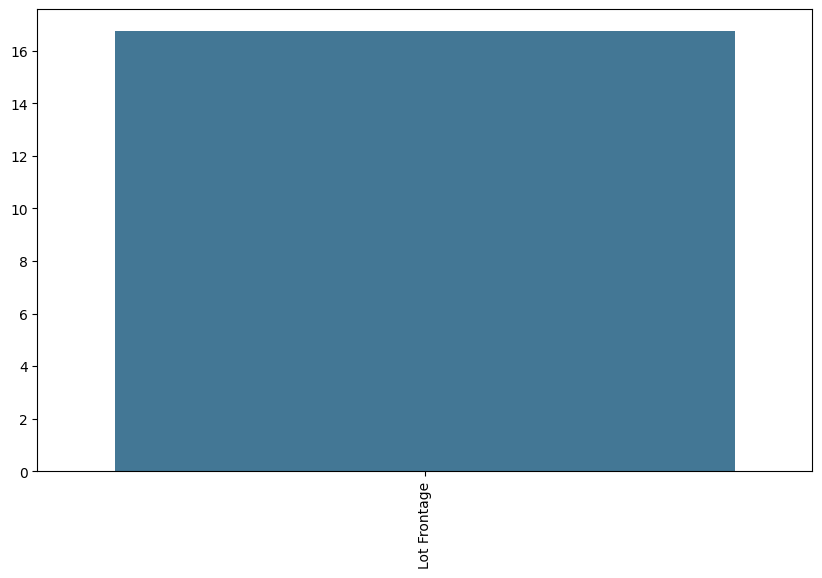

In [85]:
percent_nan=percent_missing(df)

plt.figure(figsize=(10,6))

sn.barplot(x=percent_nan.index, y=percent_nan.values, palette='mako')

plt.xticks(rotation=90)
plt.show()

In [88]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

C:\Users\NILABJA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Lot Frontage', ylabel='Count'>

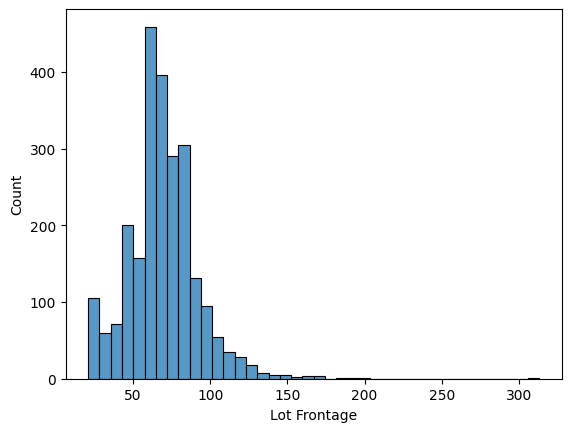

In [87]:
sn.histplot(df['Lot Frontage'], bins=40)

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

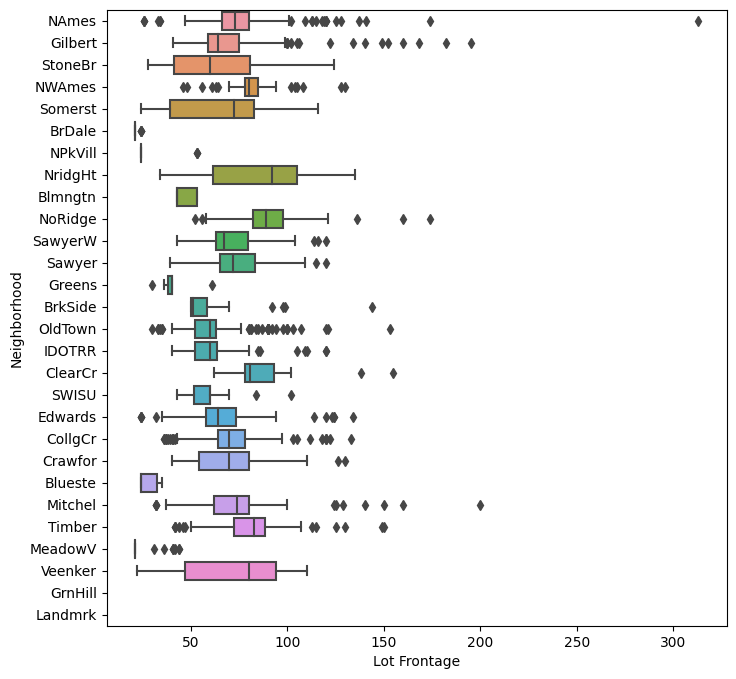

In [93]:
plt.figure(figsize=(8,8), dpi=100)
sn.boxplot(x='Lot Frontage', y='Neighborhood', data=df)

In [94]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

#### We are filling the missing values by using the mean of the feature and using pandas's transform features.

In [96]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value : value.fillna(value.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2922     37.000000
2923     75.144444
2924     62.000000
2925     77.000000
2926     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [97]:
df['Lot Frontage']=df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value : value.fillna(value.mean()))

In [98]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [105]:
df['Lot Frontage']=df['Lot Frontage'].fillna(0)

In [106]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

### So as you can see all of the missing values are handled here.

## Now Saving these to a csv for feature enginnering of category columns.

In [108]:
df.to_csv('No_missing_data.csv')